Buisness Problem

In [1]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load Dataset

In [2]:
df=pd.read_csv("student_info.csv")

In [3]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [5]:
df.shape

(200, 2)

Discover & Visulize the data to gain insights

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [7]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


Text(0.5, 1.0, 'scatter plot of Students study Hours VS Marsk')

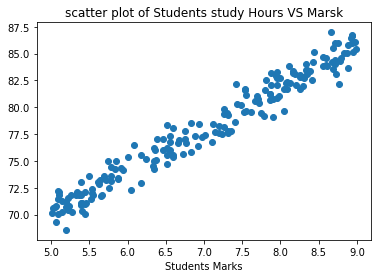

In [8]:
plt.scatter(x='study_hours',y='student_marks',data=df)
plt.xlabel("Students study Hours")
plt.xlabel("Students Marks")
plt.title("scatter plot of Students study Hours VS Marsk")

Prepare data for Machine learning algorithm

In [9]:
#data cleaning
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [10]:
s=df.mean()
s

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [11]:
a=df.fillna(s)
a.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [12]:
#split dataset
X=a.drop("student_marks",axis=1)
y=a.drop("study_hours",axis=1)
print("shape of x",X.shape)
print("shape of Y",y.shape)

shape of x (200, 1)
shape of Y (200, 1)


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=51)

In [15]:
print("shape of xtrain",X_train.shape)
print("shape of xtest",X_test.shape)
print("shape of ytrain",y_train.shape)
print("shape of ytest",y_test.shape)

shape of xtrain (160, 1)
shape of xtest (40, 1)
shape of ytrain (160, 1)
shape of ytest (40, 1)


Select the model & train it

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm=LinearRegression()

In [18]:
lm.fit(X_train,y_train)

LinearRegression()

In [19]:
lm.coef_

array([[3.93571802]])

In [20]:
lm.intercept_

array([50.44735504])

In [21]:
lm.predict([[4]])[0][0].round(2)

66.19

In [22]:
predictions=lm.predict(X_test)

In [23]:
pd.DataFrame(np.c_[X_test,y_test,predictions], columns=["study_hours","students_original_marks","students_predicted_marks"])

,study_hours,students_original_marks,students_predicted_marks
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


Fine - Tune your model

In [24]:
lm.score(X_test,y_test)

0.9514124242154464

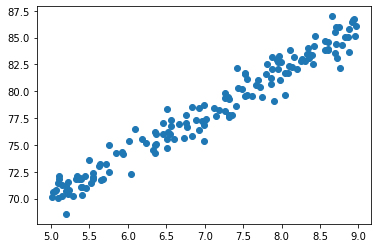

In [25]:
plt.scatter(X_train,y_train)

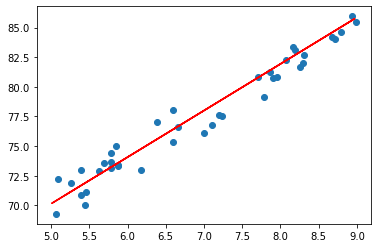

In [26]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lm.predict(X_train),color='r')

Present The Solution

Save ML Model

In [27]:
import joblib
joblib.dump(lm,"student_mark_predictor_model.pkl")

['student_mark_predictor_model.pkl']

In [28]:
model=joblib.load("http://192.168.1.40:8080/")

In [29]:
model.predict([[5]])[0][0]

70.12594512018407

Launch,Monitor & Maintain your system